In [1]:
# set env via .env file
#import os
import sys
import pathlib 
import numpy as np
import pandas as pd
#import tensorflow as tf
from importlib import reload
#import pandas_datareader.data as web
#import requests_cache
import datetime
import munch

import math
#from cachetools import TTLCache
#import time
#import ray
#import psutil
#from sqlalchemy import create_engine
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import qgrid
import mpl_finance as mf

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import shared
import config
import provider_yfinance as provider
import plot

reload(shared)
reload(config)
reload(provider)
reload(plot)

plot.Notebook()

mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)


In [2]:
cfg = config.get_config('^GDAXI', True)
config.save_config(cfg)

config> current directory:/mnt/c/notebooks/sandbox
config> data period: from '2018-02-03' to '2020-01-04'
config> download period: from '2017-11-18' to '2020-01-04'
shared> parsing stocks from web '^GDAXI' ...
config> benchmarks: '['000001.SS', 'AUDUSD=X', 'BTCUSD=X', 'CNY=X', 'ETHUSD=X', 'EURCAD=X', 'EURCHF=X', 'EURGBP=X', 'EURHUF=X', 'EURJPY=X', 'EURJPY=X', 'EURSEK=X', 'EURUSD=X', 'GBPJPY=X', 'GBPUSD=X', 'GC=F', 'HKD=X', 'IDR=X', 'IMOEX.ME', 'INR=X', 'JPY=X', 'KW=F', 'LC=F', 'LH=F', 'MXN=X', 'MYR=X', 'NZDUSD=X', 'PA=F', 'PHP=X', 'PL=F', 'RUB=X', 'S=F', 'SGD=X', 'SI=F', 'SM=F', 'THB=X', 'ZAR=X', '^AORD', '^AXJO', '^BFX', '^BSESN', '^BUK100P', '^BVSP', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^GSPTSE', '^HSI', '^IPSA', '^IXIC', '^JKSE', '^JN0U.JO', '^KLSE', '^KS11', '^MERV', '^MXX', '^N100', '^N225', '^NYA', '^NZ50', '^RUT', '^STI', '^STOXX50E', '^TA125.TA', '^TWII', '^VIX', '^XAX']'
config> stocks: '['1COV.DE', 'ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CON.DE'

In [3]:
%%time

cfg_stocks, data_stocks = provider.load_stocks(cfg)

tickers-stocks> downloading histories ...
[*********************100%***********************]  30 of 30 completed
WARN: tickers-stocks> #missing: 48110
ticker-1COV.DE> loading ticker data ...
ticker-ADS.DE> loading ticker data ...
ticker-ALV.DE> loading ticker data ...
ticker-BAS.DE> loading ticker data ...
ticker-BAYN.DE> loading ticker data ...
ticker-BEI.DE> loading ticker data ...
WARN: ticker-BEI.DE> #missing: 10
ticker-BMW.DE> loading ticker data ...
ticker-CON.DE> loading ticker data ...
yf-cashflowStatementHistory> internal error: Internal Server Error
yf-cashflowStatementHistoryQuarterly> internal error: Internal Server Error
yf-balanceSheetHistory> internal error: Internal Server Error
yf-balanceSheetHistoryQuarterly> internal error: Internal Server Error
yf-incomeStatementHistory> internal error: Internal Server Error
yf-incomeStatementHistoryQuarterly> internal error: Internal Server Error
yf-earnings> internal error: Internal Server Error
ticker-DAI.DE> loading ticker data 

In [4]:
%%time

cfg_benchmarks, data_benchmarks = provider.load_benchmarks(cfg)

tickers-benchmarks> downloading histories ...
[*********************100%***********************]  68 of 68 completed
WARN: tickers-benchmarks> #missing: 151454
ticker-000001.SS> loading ticker data ...
ticker-AUDUSD=X> loading ticker data ...
ticker-BTCUSD=X> loading ticker data ...
ticker-CNY=X> loading ticker data ...
ticker-ETHUSD=X> loading ticker data ...
ticker-EURCAD=X> loading ticker data ...
ticker-EURCHF=X> loading ticker data ...
ticker-EURGBP=X> loading ticker data ...
ticker-EURHUF=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURSEK=X> loading ticker data ...
ticker-EURUSD=X> loading ticker data ...
ticker-GBPJPY=X> loading ticker data ...
ticker-GBPUSD=X> loading ticker data ...
ticker-GC=F> loading ticker data ...
ticker-HKD=X> loading ticker data ...
ticker-IDR=X> loading ticker data ...
ticker-IMOEX.ME> loading ticker data ...
ticker-INR=X> loading ticker data ...
ticker-JPY=X> loading ticker data .

In [5]:
dates = next(shared.filter_dates_generator(cfg, -1))
dates

Munch({'train_start_dt': datetime.datetime(2019, 5, 23, 0, 0), 'train_end_dt': datetime.datetime(2019, 8, 31, 0, 0), 'predict_start_dt': datetime.datetime(2019, 9, 1, 0, 0), 'predict_end_dt': datetime.datetime(2019, 9, 7, 0, 0)})

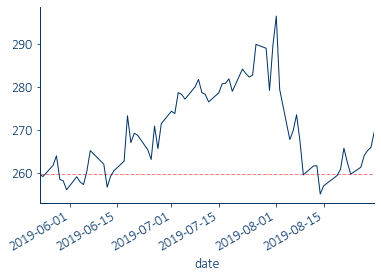

In [6]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates)
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

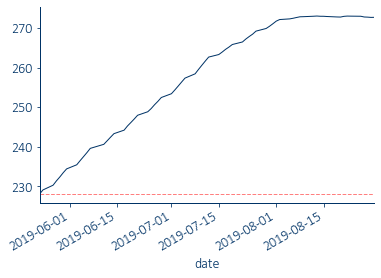

In [7]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_ma(cfg.train.window_trading_days[-1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

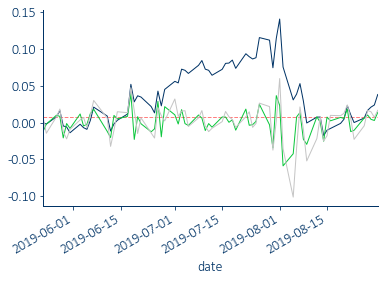

In [8]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_rel) - 1
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train.lag_trading_days[0]))
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train.lag_trading_days[1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

In [9]:
features = set()
for k in cfg_stocks.data.keys():
    features |= set(cfg_stocks.data[k].keys())
for k in cfg_benchmarks.data.keys():
    features |= set(cfg_benchmarks.data[k].keys())
features = sorted(list(features))
features

['balancesheet',
 'calendar',
 'calls',
 'cashflow',
 'earnings',
 'financials',
 'history',
 'info',
 'puts',
 'recommendations',
 'sustainability']

In [10]:
stats_stocks = pd.DataFrame.from_dict(cfg_stocks.data, orient='index', columns=features)
stats_stocks['type'] = 'stock'
stats_benchmarks = pd.DataFrame.from_dict(cfg_benchmarks.data, orient='index', columns=features)
stats_benchmarks['type'] = 'benchmark'
df_stats = pd.concat([stats_stocks, stats_benchmarks])
df_stats.to_csv(f'{cfg.prepare.cache_dir}/metrics.csv')

In [11]:
df_stats

,balancesheet,calendar,calls,cashflow,earnings,financials,history,info,puts,recommendations,sustainability,type
1COV.DE,"(4, 28)","(1, 6)",NaN,"(4, 20)","(4, 2)","(4, 22)","(1070, 7)",117,NaN,NaN,"(1, 28)",stock
ADS.DE,"(4, 27)","(1, 6)",NaN,"(4, 19)","(4, 2)","(4, 22)","(5497, 7)",118,NaN,"(2, 4)","(1, 28)",stock
ALV.DE,"(4, 27)","(1, 6)",NaN,"(4, 2)","(4, 2)","(4, 22)","(5858, 7)",117,NaN,NaN,"(1, 28)",stock
BAS.DE,"(4, 27)","(1, 6)",NaN,"(4, 20)","(0, 6)","(4, 22)","(5866, 7)",117,NaN,NaN,"(1, 28)",stock
BAYN.DE,"(4, 28)","(1, 6)",NaN,"(4, 18)","(4, 2)","(4, 22)","(5868, 7)",116,NaN,NaN,"(1, 28)",stock
...,...,...,...,...,...,...,...,...,...,...,...,...
^STOXX50E,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(8383, 7)",61,NaN,NaN,NaN,benchmark
^TA125.TA,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(5537, 7)",61,NaN,NaN,NaN,benchmark
^TWII,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(5524, 7)",61,NaN,NaN,NaN,benchmark
^VIX,"(6, 0)",NaN,"(28, 13)","(6, 0)","(0, 6)","(6, 0)","(7552, 7)",61,"(19, 13)",NaN,NaN,benchmark
